<a href="https://colab.research.google.com/github/dayanallima/ciencia_dados/blob/main/MVP_SprintI_DayanaLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pontifícia Universidade Católica do Rio de Janeiro – PUC  Rio**

# Especialização em Ciência de Dados e Analytics

## Sprint I: Análise de Dados e Boas Práticas

## Disciplina 01: Análise Exploratória e Pré-Processamento de Dados

---

---

## Dayana de Lima e Silva


# Minimun Viable Product - MVP

# 1.Definição do Problema

## Descrição
A ANP divulgou os dados de produçã0 de óleo dos campos de terra, mar e pré-sal dos meses de janeiro e fevereiro de 2023. O objetivo desse MVP é traçar um panorama do cenário atual da produção no Brasil. 

## Modelo de Aprendizado
Esse MVP é um modelo de aprendizado supervisionado, pois é construído a partir dos dados de entrada que serão apresentados para um algoritmo na forma de pares ordenados (entrada – saída desejada). Esses dados são rotulados, pois já é de conhecimento, a saída esperada para cada entrada de dados. Nesse caso, o aprendizado (ou treinamento) consiste em apresentar para o algoritmo um número suficiente de exemplos de entradas e saídas desejadas (já rotuladas previamente). Assim, o objetivo do algoritmo é aprender uma regra geral que mapeie as entradas nas saídas corretamente, o que consiste no modelo final.

## Premissas
Apenas a produção de óleo é de interesse para apresentação.
Os arquivos bases serão usados no formato .xlsx conforme bases originais para evitar perdas para outras extensoes.

## Condições e Restrições

Dados apenas de 2023 retirados do dompinio público: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-estatisticos

Caminho do material:

1. Produção de Petróleo e Gás Natural em Dados Estatísticos.

2. Produção por poços: Panorama anual da produção nacional de petróleo e gás natural por poço, divididos em mar e terra.

3. Produção por poço em 2023.

Para facilitar a análise, foi criada em cada arquivo uma coluna "Exploração" identificando o ambiente: terra, mar ou pré-sal. Isso foi feito ainda no excel tendo em vista a dificuldade de fazer esse agrupamento via código pois o meio que poderia ser usado, seria o nome do poço o que implicaria numa atribuição extensa de cada poço a seu meio de exploração.  

## Atributos
Para a análise, o foco será na produção de óleo e como esta se distribui nos estados, campos, bacias etc.

###->Estado
Unidade federativa do país. O Brasil tem 26 estados mais o distrito federal.

###->Exploração
Meio onde o petróleo foi explorado, podendo ser em terra, mar (não pré sal) e no pré sal. Estruturalmente, a exploração do mar com pré sal se diferencia da exploração no mar "comum" por apresnetar uma camada de sal antes da área de produção.

###->Bacia
Bacia ou bacia sedimentar é o espaço onde há a formação de petróleo e alguns tipos de fósseis.

###->Nome_ANP
Código de descrição do poço segundo nomenclatura da Agência Nacional de Petróleo - ANP.

###->Campo
Um é uma área, na bacia, onde estão instalados equipamentos para extração de combustível fóssil.

###->Operador
Operador ou empresa operadora é a companhia responsável por operacionalizar as atividades de um campo.

###->Período
Intervalo de tempo que foi feito o registro da produção. Nesse dataset, janeiro e fevereiro de 2023.

###->Oleo_bpd
Produção de óleo em barris por dia (bpd). 1m³/d equivale a 6,2898 bpd.

###->Grau_API
O Grau API é uma escala que mede a densidade dos líquidos derivados do petróleo. A escala API, medida em graus, varia inversamente à densidade relativa, isto é, quanto maior a densidade relativa, menor o grau API. O grau API é maior quando o petróleo é mais leve. Se o grau API for superior a 10, o petróleo flutua na água. Se for menor que 10, o petróleo é mais denso que a água e afunda. Petróleos com grau API maior que 31 são considerados leves; entre 22 e 31 graus API, são médios; abaixo de 22 graus API, são pesados; com grau API igual ou inferior a 10, são petróleos extrapesados. Quanto maior o grau API, maior o valor do petróleo no mercado, pois, sendo mais leve, ele fornece derivados de maior valor agregado e tem um processo de refino mais barato.

### ▶ Início do Código

## -> Configurações Iniciais

In [ ]:
## Configuração para não exibir "Mensagens de Aviso" (Warnings)
# A determinação de omitir ou não uma mensagem de aviso é controlada 
# pelo filtro de aviso, que é uma sequência de regras e ações correspondentes. 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Importação de Pacotes

# Pandas: Pacote que fornece ferramentas com grande poder para manipulação e análise de dados, de maneira simples e eficiente.
# Numpy: Pacote cujo foco são as operações matemáticas.
# Matplotlib.pyplot: Pacote que permite a criação de uma figura e uma área padrão para exibir gráfico.
# Seaborn: Pacote de ferramentas para plotagem dos mais variados tipos de gráficos.
# Missingno: Pacote para tratamento de dados não representativos.
# Sklearn: Pacote de ferramentas para tarefas comuns de aprendizado de máquina.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms 
from matplotlib import cm

# Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização

# Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

#  Divide o conjunto de dados em treinamento e teste
from sklearn.model_selection import train_test_split

# 2.Coleta e Análise de Dados


## 2.1. Importação das Bases de Dados

In [ ]:
## Carga da Base de Dados
# O dataset está em domínio público no GitHub, uma plataforma de hospedagem de código-fonte.

## Caminho das Bases de Dados

# Base 1 - Dados de produção de Terra em Jan/23
base_01 = "https://github.com/dayanallima/ciencia_dados/blob/main/2023_01_producao_Terra.xlsx?raw=true"

# Base 2 - Dados de produção de Terra em Fev/23
base_02 = "https://github.com/dayanallima/ciencia_dados/blob/main/2023_02_producao_Terra.xlsx?raw=true"

# Base 3 - Dados de produção do Mar em Jan/23
base_03 = "https://github.com/dayanallima/ciencia_dados/blob/main/2023_01_producao_Mar.xlsx?raw=true"

# Base 4 - Dados de produção do Mar em Fev/23
base_04 = "https://github.com/dayanallima/ciencia_dados/blob/main/2023_02_producao_Mar.xlsx?raw=true"

# Base 5 - Dados de produção do Pré sal em Jan/23
base_05 = "https://github.com/dayanallima/ciencia_dados/blob/main/2023_01_producao_Presal.xlsx?raw=true"

# Base 6 - Dados de produção do Pré sal em Fev/23
base_06 = "https://github.com/dayanallima/ciencia_dados/blob/main/2023_01_producao_Presal.xlsx?raw=true"


## Leitura dos Arquivos

dataset_01 = pd.read_excel(base_01)
dataset_02 = pd.read_excel(base_02)
dataset_03 = pd.read_excel(base_03)
dataset_04 = pd.read_excel(base_04)
dataset_05 = pd.read_excel(base_05)
dataset_06 = pd.read_excel(base_06)

##2.2. Explorando as Bases de Dados

### 2.2.1. Dimensões (linhas e colunas) dos datasets

In [ ]:
# Dimensões do dataset 1 (linhas, colunas)
print('Dimensões do DataSet 1:')
dataset_01.shape

Dimensões do DataSet 1:


(5471, 49)

In [ ]:
# Dimensões do dataset 2 (linhas, colunas)
print('Dimensões do DataSet 2:')
dataset_02.shape


Dimensões do DataSet 2:


(5117, 49)

In [ ]:
# Dimensões do dataset 3 (linhas, colunas)
print('Dimensões do DataSet 3:')
dataset_03.shape


Dimensões do DataSet 3:


(839, 49)

In [ ]:
# Dimensões do dataset 4 (linhas, colunas)
print('Dimensões do DataSet 4:')
dataset_04.shape


Dimensões do DataSet 4:


(769, 49)

In [ ]:
# Dimensões do dataset 5 (linhas, colunas)
print('Dimensões do DataSet 5:')
dataset_05.shape


Dimensões do DataSet 5:


(346, 49)

In [ ]:
# Dimensões do dataset 6 (linhas, colunas)
print('Dimensões do DataSet 6:')
dataset_06.shape


Dimensões do DataSet 6:


(346, 49)

Os 6 datasets apresentam 49 colunas. 
Se as colunas forem iguais, os datasets poderão ser concatenados em um só.
Um ponto a ser observado é o maior número de linhas nos datasets de produção em terra. Como os registros são por poço, é explicado, tendo em vista o número muito maior de poços em terra do que em mar e ainda maior do que o quatitativo do pré-sal.

### 2.2.2. Listas das colunas dos datasets

In [ ]:
# Checagem das colunas do dataset 1
print('Colunas do DataSet 1:')
dataset_01.columns

Colunas do DataSet 1:


Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

In [ ]:
# Checagem das colunas do dataset 2
print('Colunas do DataSet 2:')
dataset_02.columns

Colunas do DataSet 2:


Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

In [ ]:
# Checagem das colunas do dataset 3
print('Colunas do DataSet 3:')
dataset_03.columns

Colunas do DataSet 3:


Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

In [ ]:
# Checagem das colunas do dataset 4
print('Colunas do DataSet 4:')
dataset_04.columns

Colunas do DataSet 4:


Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

In [ ]:
# Checagem das colunas do dataset 5
print('Colunas do DataSet 5:')
dataset_05.columns

Colunas do DataSet 5:


Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

In [ ]:
# Checagem das colunas do dataset 6
print('Colunas do DataSet 6:')
dataset_06.columns

Colunas do DataSet 6:


Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

Os 6 datasets apresentam as mesmas colunas.
Para melhor trabalhar com os dados, serão concatenadas.

###2.2.3. Concatenando as bases em um só Dataset

In [ ]:
# Cria um dataset unindo as 6 bases importadas
dataset = pd.concat([dataset_01, dataset_02, dataset_03, dataset_04, dataset_05, dataset_06])

###2.2.4. Dimensões (linhas e colunas) do Dataset Único

In [ ]:
# Dimensões do dataset (linhas, colunas)
dataset.shape

(12888, 49)

In [ ]:
# Checagem das colunas 
dataset.columns

Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Nome_Operador', 'Campo',
       'Operador', 'Contrato', 'Período', 'Óleo_bpd', 'Condensado_bpd',
       'Petróleo_bpd', 'Gás_Natural_Associado_(Mm³/dia)',
       'Gás_Natural_Não Associado_(Mm³/dia)', 'Gás_Natural_Total_(Mm³/dia)',
       'Volume_Gás_Royalties_(Mm³/dia)', 'Água_bpd', 'Instalação_Destino',
       'Tipo_Instalação', 'Tempo_de_Produção_h_por_mes', 'Período_Carga',
       'Corrente', 'Grau_API', 'Fração_Destilados_Leves_Corte',
       'Fração_Destilados_Leves_Volume', 'Fração_Destilados_Médios_Corte',
       'Fração_Destilados_Médios_Volume', 'Fração_Destilados_Pesados_Corte',
       'Fração_Destilados_Pesados_Volume', 'Percentual_em_Volumes_Metano',
       'Percentual_em_Volumes_Etano', 'Percentual_em_Volumes_Propano',
       'Percentual_em_Volumes_Iso-Butano', 'Percentual_em_Volumes_Butano',
       'Percentual_em_Volumes_Iso-Pentano', 'Percentual_em_Volumes_n-Pentano',
       'Percentual_em_Volumes_Hexanos', 'Percentua

O novo dataset possui o somatório de linhas das 6 bases juntas e o mesmo número de colunas, conforme esperado.

###2.2.5. Explorando o Dataset Único

In [ ]:
# Visualização das 5 primeiras linhas
dataset.head(5)

,Estado,Exploração,Bacia,Nome_ANP,Nome_Operador,Campo,Operador,Contrato,Período,Óleo_bpd,...,Percentual_em_Volumes_Nonanos,Percentual_em_Volumes_Decanos,Percentual_em_Volumes_Undecanos,Percentual_em_Volumes_Oxigênio,Percentual_em_Volumes_Nitrogênio,Percentual_em_Volumes_Gás Carbônico,Densidade_GLP_Gás,Densidade_GLP_Líquido,PCS_GP_KJ_por_metro_cubico,Data_Atualização
0,Espírito Santo,Terra,Espírito Santo,1-VITA-2A-ES,1PG01AES,TUCANO,Vipetro,48610001402200835,2023/01,5.9461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-13 02:39:17
1,Espírito Santo,Terra,Espírito Santo,7-CNC-21-ES,7CNC21ES,CANCÃ,Petrobras,486100094912003,2023/01,69.2869,...,0.020,0.000,0.0,0.000,0.5800,0.680,2.07845,537.43620,37725.8764,2023-03-13 02:39:47
2,Rio Grande do Norte,Terra,Potiguar,7-FP-211-RN,7FP 0211 RN,FAZENDA POCINHO,Petrobras,480000037999773,2023/01,0.6247,...,0.055,0.096,0.0,0.075,3.3850,6.799,2.08223,537.37907,34183.0102,2023-03-13 02:39:39
3,Bahia,Terra,Recôncavo,1-ALV-11-BA,1-ALV-198-A1-BA,CABURÉ LESTE,Alvopetro,48610000057201461,2023/01,0.0000,...,0.000,0.000,0.0,0.000,0.7859,0.131,2.04026,532.90223,39911.0322,2023-03-13 02:40:27
4,Bahia,Terra,Recôncavo,8-DJ-754-BA,8DJ 0754 BA,DOM JOÃO,3R Candeias S.A.,480000036449737,2023/01,4.9405,...,0.010,0.000,0.0,0.030,1.7700,2.720,2.08205,537.89382,37529.5793,2023-03-13 02:38:56


In [ ]:
# Visualização as 5 últimas linhas
dataset.tail(5)

,Estado,Exploração,Bacia,Nome_ANP,Nome_Operador,Campo,Operador,Contrato,Período,Óleo_bpd,...,Percentual_em_Volumes_Nonanos,Percentual_em_Volumes_Decanos,Percentual_em_Volumes_Undecanos,Percentual_em_Volumes_Oxigênio,Percentual_em_Volumes_Nitrogênio,Percentual_em_Volumes_Gás Carbônico,Densidade_GLP_Gás,Densidade_GLP_Líquido,PCS_GP_KJ_por_metro_cubico,Data_Atualização
341,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-31D-RJS,7BUZ31DRJS,BÚZIOS,Petrobras,48610012913201005,2023/01,10217.2163,...,0.04,0.01,0.0,0.2,1.31,11.58,2.04893,533.88699,35593.3546,2023-03-13 02:39:49
342,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-30-RJS,7BUZ30RJS,BÚZIOS,Petrobras,48610012913201005,2023/01,10972.9944,...,0.04,0.01,0.0,0.2,1.31,11.58,2.04893,533.88699,35593.3546,2023-03-13 02:39:49
343,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-29D-RJS,7BUZ29DRJS,BÚZIOS,Petrobras,48610012913201005,2023/01,3896.5870,...,0.04,0.01,0.0,0.2,1.31,11.58,2.04893,533.88699,35593.3546,2023-03-13 02:39:49
344,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-36DA-RJS,7BUZ36DARJS,BÚZIOS,Petrobras,48610012913201005,2023/01,2954.0391,...,0.04,0.01,0.0,0.2,1.31,11.58,2.04893,533.88699,35593.3546,2023-03-13 02:39:49
345,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-24D-RJS,7BUZ24DRJS,BÚZIOS,Petrobras,48610012913201005,2023/01,11995.2534,...,0.04,0.01,0.0,0.2,1.31,11.58,2.04893,533.88699,35593.3546,2023-03-13 02:39:49


In [ ]:
# Mostra as informações resumidas do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 345
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Estado                               12888 non-null  object        
 1   Exploração                           12888 non-null  object        
 2   Bacia                                12888 non-null  object        
 3   Nome_ANP                             12888 non-null  object        
 4   Nome_Operador                        12888 non-null  object        
 5   Campo                                12888 non-null  object        
 6   Operador                             12888 non-null  object        
 7   Contrato                             12888 non-null  object        
 8   Período                              12888 non-null  object        
 9   Óleo_bpd                             12888 non-null  float64       
 10  Condensado_b

Para o objetivo do MVP, o dataset único apresenta mais dados do que o necessário. Um dataset para análise será criado com apenas as colunas a serem exploradas. As colunas numéricas de interesse serão: Óleo_bpd e Grau_API, ambas já apresentadas como float e portanto, numéricas.

##2.3. Criando um Dataset para Análise

Em estatística, a população é a coleção de todos os indivíduos que apresentam determinadas características que de interesse do estudo. A amostra é um subconjunto da população, uma parte dos indivíduos que apresentam determinadas características.
Nesse MVP, a população são os 6 datasets importados e concatenados em um só. A amostra é a base de análise que será criada a partir daqui.

In [ ]:
## Cria uma base para análise apenas com as colunas desejadas
# Arquivo para Análise
dataset_analise = dataset[['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 
                           'Campo', 'Operador', 'Período', 'Óleo_bpd', 'Grau_API']]

###2.3.1. Explorando o Dataset para Análise

####2.3.1.a. Colunas e Linhas

In [ ]:
# Dimensões do dataset para análise
dataset_analise.shape

(12888, 9)

In [ ]:
# Checagem das colunas 
dataset_analise.columns

Index(['Estado', 'Exploração', 'Bacia', 'Nome_ANP', 'Campo', 'Operador',
       'Período', 'Óleo_bpd', 'Grau_API'],
      dtype='object')

O universo de 49 colunas foi reduzido para 9, compactando o volume de dados a serem trabalhados e as linhas mantidas, preservando os dados.

####2.3.1.b. Tipos de Atributos

In [ ]:
# Mostra as informações resumidas do dataset
dataset_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12888 entries, 0 to 345
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Estado      12888 non-null  object 
 1   Exploração  12888 non-null  object 
 2   Bacia       12888 non-null  object 
 3   Nome_ANP    12888 non-null  object 
 4   Campo       12888 non-null  object 
 5   Operador    12888 non-null  object 
 6   Período     12888 non-null  object 
 7   Óleo_bpd    12888 non-null  float64
 8   Grau_API    10911 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1006.9+ KB


Essas informações expressam que para os dados de Grau API, das 12888 linhas, 10911 não são nulas. Logo 1977 registros estão nulos. 
Também revelam que todos os atributos são do tipo objeto, para as colunas de texto e numéricos decimais para  Óleo_bpd e Grau_API.
E o universo de 49 colunas foi reduzido para 9, compactando o volume de dados a ser trabalhados e as linhas mantidas, preservando os dados.

####2.3.1.c. Valores Faltantes

In [ ]:
# Visualização das 5 primeiras linhas
dataset_analise.head(5)

,Estado,Exploração,Bacia,Nome_ANP,Campo,Operador,Período,Óleo_bpd,Grau_API
0,Espírito Santo,Terra,Espírito Santo,1-VITA-2A-ES,TUCANO,Vipetro,2023/01,5.9461,16.0
1,Espírito Santo,Terra,Espírito Santo,7-CNC-21-ES,CANCÃ,Petrobras,2023/01,69.2869,19.6
2,Rio Grande do Norte,Terra,Potiguar,7-FP-211-RN,FAZENDA POCINHO,Petrobras,2023/01,0.6247,23.2
3,Bahia,Terra,Recôncavo,1-ALV-11-BA,CABURÉ LESTE,Alvopetro,2023/01,0.0000,NaN
4,Bahia,Terra,Recôncavo,8-DJ-754-BA,DOM JOÃO,3R Candeias S.A.,2023/01,4.9405,36.5


In [ ]:
# Visualização das 5 últimas linhas
dataset_analise.tail(5)

,Estado,Exploração,Bacia,Nome_ANP,Campo,Operador,Período,Óleo_bpd,Grau_API
341,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-31D-RJS,BÚZIOS,Petrobras,2023/01,10217.2163,28.7
342,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-30-RJS,BÚZIOS,Petrobras,2023/01,10972.9944,28.7
343,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-29D-RJS,BÚZIOS,Petrobras,2023/01,3896.5870,28.7
344,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-36DA-RJS,BÚZIOS,Petrobras,2023/01,2954.0391,28.7
345,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-24D-RJS,BÚZIOS,Petrobras,2023/01,11995.2534,28.7


In [ ]:
# Visualização dos valores nulos
dataset_analise.isnull().sum()

Estado           0
Exploração       0
Bacia            0
Nome_ANP         0
Campo            0
Operador         0
Período          0
Óleo_bpd         0
Grau_API      1977
dtype: int64

Os registros em branco aparecem apenas para Grau_API. Pelos registros nas últimas linhas, são dados tipo NaN (Not a Number), ou seja, não há um número nesses campos. Todos esses dados serão tratados no pré-processamento.

####2.3.1.d. Resumo Estatístico

Como o dataset tem variáveis numéricas e categóricas, o resumo estatístico precisa ser exlicitado que todos os atributos devem ser analisados, por isso, a inclisão do argumento "include='all'"

In [ ]:
# Faz um resumo estatístico do dataset
dataset_analise.describe(include = 'all')

,Estado,Exploração,Bacia,Nome_ANP,Campo,Operador,Período,Óleo_bpd,Grau_API
count,12888,12888,12888,12888,12888,12888,12888,12888.000000,10911.000000
unique,11,3,14,6121,293,51,2,NaN,NaN
top,Rio Grande do Norte,Terra,Potiguar,7-SPH-5-SPS,ESTREITO,Petrobras,2023/01,NaN,NaN
freq,6558,10588,6971,16,1853,7621,7002,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,892.415681,25.486857
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3898.319145,6.768129
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,13.200000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.775600,23.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.019650,23.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.411125,27.400000


A descrição acima demonstra que há um total de 12888 registros para produção de óleo e 10911 para os dados de Grau API conforme já havia sido visualizado nos dados faltantes. As informações mostram também que o valor mínimo para produção foi zero, o que não necessariamente deve ser tratado como erro, pois de fato, o poço pode não ter produzido e por isso, esses dados serão mantidos. O resumo mostra que há 11 estados brasileiros diferentes na base de dados. As bacias são 14 onde estão os 6121 poços distribuídos em 293 campos e operados por 51 empresas. E essas dados se distribuem nos 3 ambientes de exploração: terra, mar e pré-sal.
É interessante notar que a bacia Potiguar é a que possui mais registros e o estado do Rio Grande do Norte é o que apresenta mais dados. Vale lembrar que a bacia Potiguar é composta pelos estados do RN e CE. O campo com mais entradas é o de Estreito também no RN. Isso é resultado da extensa quantidade de poços em terra diferentemente do que ocorre no mar. 

##2.4. Visualizações

As visualizações ajudam a identificar padrões, tendências e anomalias nos dados, permitindo que se faça inferências e tome decisões.
Nesse MVP, serão visualizados os dados de produção de óleo e grau API.







####2.4.1.a. Histograma

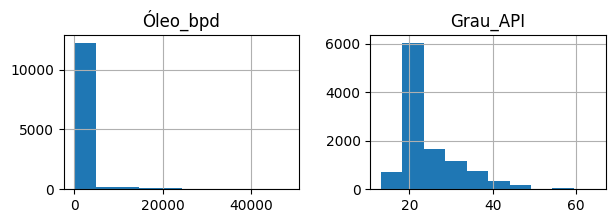

In [ ]:
# Viualização por meio de histograma
dataset_analise.hist(figsize = (7,2))
plt.show()

O histograma mostra a concentração da produção de óleo em torno de 0, mostrando produções baixas na maioria dos poços, visto que, tem-se um grande volume de poços em terra. O grau API se concentra em torno de 20 caracterizando o óleo mais pesado nessa faixa. Essas informações mostram coerência com a realidade, uma vez que os óleos mais leves (de maior grau API), estão mais na região do pré-sal, que produz mais com menos poços e portanto, menos registros. 

####2.4.1.b. Gráfico de Densidade

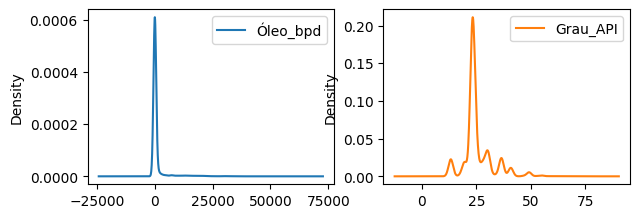

In [ ]:
# Visualização por meio de Gráfico de Densidade
dataset_analise.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False, figsize = (7,5))
plt.show()

O gráfico de densidade confirma o histograma apresentando o mesmo comportamento.

####2.4.1.c. Diagrama de Caixa

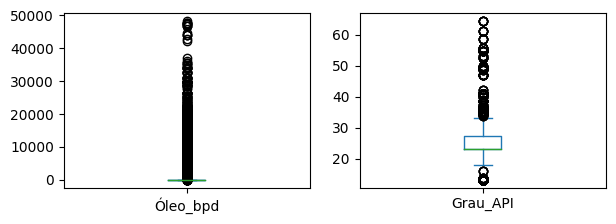

In [ ]:
## Visualização por meio do Diagrama de Caixa
dataset_analise.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, figsize = (7,5))
plt.show()

O Diagrama de Caixa não é uma boa visualização para os dados em questão. Como os dados de produção podem ser discrepantes entre regiões, visualiza-se muitos outliers que na verdade não são pontos "fora da curva" nesse contexto e sim, dados muito diferentes. Para o Grau API, a caixa mostra que a maioria dos dados está na zona de óleo pesado como já foi visto nas visualiações anteriores.

###2.4.1.d. Mapa de Calor


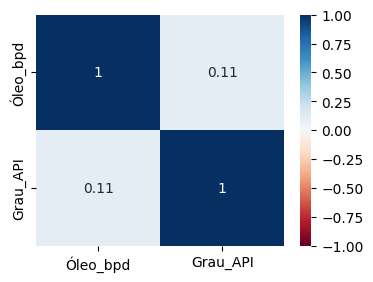

In [ ]:
# Visualização por meio do Mapa de Calor ou Matriz de Correlação
plt.figure(figsize = (4,3))
sns.heatmap(dataset_analise.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

O Mapa de Calor também não se mostra uma boa opção para esse MVP. Primeiro porque são apenas duas variáveis e segundo porque de fato, elas não se relacionam, o volume da produção não interfere no grau API, uma vez que, o volume produzido é uma característica do reservatório e o grau API uma caracyerística do óleo.

# 3.Pré-Processamento de Dados



##3.1. Tratamento de Missings
Os valores tipo missing são aqueles faltantes ou considerados não representativos.

In [ ]:
# Visualização dos valores nulos
dataset_analise.isnull().sum()

Estado           0
Exploração       0
Bacia            0
Nome_ANP         0
Campo            0
Operador         0
Período          0
Óleo_bpd         0
Grau_API      1977
dtype: int64

Essas informações evidenciam que há 1977 dados de missings a serem tratados.

####3.1.1. Salvando o dataset para tratamento


<Axes: >

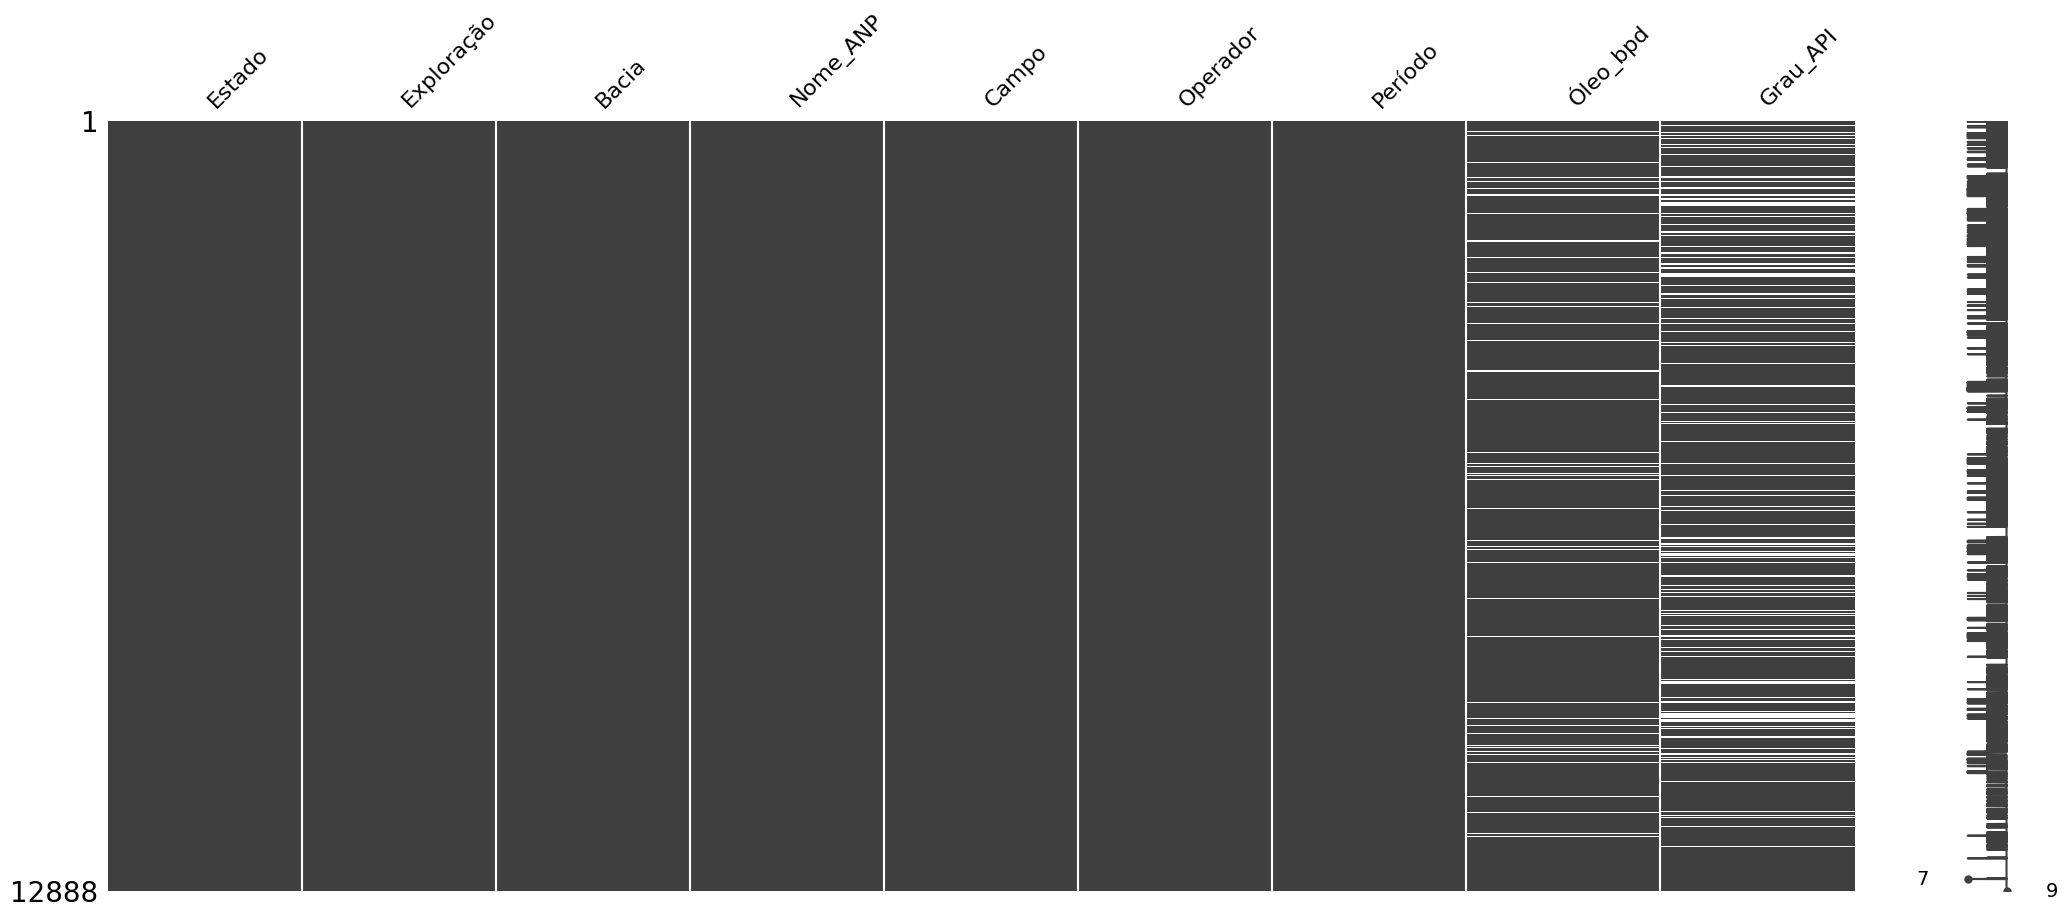

In [ ]:
# Recupera os nomes das colunas
col = list(dataset_analise.columns)

# O novo dataset irá conter todas as colunas do dataset extraído para a análise
datasetSemMissings = dataset_analise[col[:]]

# Substitui os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# Exibe a visualização matricial da nulidde do data set
ms.matrix(datasetSemMissings)

Os dados de produção igual a zero serão considerados como não registro de produção do poço no período e os dados NaN de Grau APi não serão eliminados para não reduzir as informações da base de dados, visto que, essas ausências não comprometerão a análise.

##3.2. Normalização

A normalização de dados consiste em remodelar colunas numéricas para uma escala padrão.
A normalização coloca os dados no intervalo entre 0 e 1 ou -1 e 1, caso haja valores negativos, sem distorcer as diferenças nas faixas de valores. Ou seja, ela não retira os outliers (valores extremos).

In [ ]:
## Define um dataset pequeno e artificial
dataset_artificial = dataset[['Óleo_bpd', 'Grau_API']]

# Define o transformador com min max scaler
scaler = MinMaxScaler()

# Transforma os dados
scaled = scaler.fit_transform(dataset_teste)
print(scaled)

[[1.22760335e-04 5.44323484e-02]
 [1.43046418e-03 1.24416796e-01]
 [1.28972573e-05 1.94401244e-01]
 ...
 [8.04470707e-02 3.01321928e-01]
 [6.09876777e-02 3.01321928e-01]
 [2.47648262e-01 3.01321928e-01]]


##3.3. Padronização

A padronização tem a mesma ideia da normalização, isto é, colocar os dados em uma mesma escala. Porém, na padronização, colocamos a média dos dados em 0 e o desvio padrão em 1. Esse algoritmo é melhor utilizado quando a diatribuição é Gaussiana.

In [ ]:
# Define o transformador com standard scaler
scaler = StandardScaler()

# Transforma os dados para o dataset pequeo e artificial
scaled = scaler.fit_transform(dataset_artificial)
print(scaled)

[[-0.22740672 -1.40176002]
 [-0.21115786 -0.86983085]
 [-0.22877182 -0.33790169]
 ...
 [ 0.77066237  0.47476786]
 [ 0.52886984  0.47476786]
 [ 2.84821947  0.47476786]]


##3.4. One Hot Encoding

A técnica de One Hot Ecodinng é usada para tratar variáveis categóricas.

In [ ]:
# Define o transformador como one hot encodig
encoder = OneHotEncoder(sparse=False)

# Transformaos dados para o dataset pequeno e artificial
onehot = encoder.fit_transform(dataset_artificial)
print(onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##3.5. Conjuntos de Treinamento e Teste

Teste e treinamento de modelos fazem parte de uma técnica comum na ciência de dados e na aprendizagem de máquina. Envolve a divisão dos dados em dois conjuntos distintos: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para ajustar os parâmetros do modelo. O conjunto de teste é usado para avaliar a capacidade do modelo de generalizar, ou seja, sua capacidade de fazer previsões precisas em dados que não foram usados no treinamento.

In [ ]:
# Divide o dataset_artifical em conjuntos de treinamento e teste. 
treino_set, teste_set = train_test_split(dataset_artificial, test_size=0.2, random_state=42)

print(treino_set)
print(teste_set)

      Óleo_bpd  Grau_API
477    53.6718       NaN
2464    0.0000      28.2
2220    3.1346      23.2
4660    9.7953       NaN
1805    8.8642      13.3
...        ...       ...
537   146.5404      18.1
5191    0.0000      23.2
5390    9.8606      23.2
860     1.7147      23.2
1799   11.2392      24.5

[10310 rows x 2 columns]
        Óleo_bpd  Grau_API
8         3.5172     16.00
4513      4.5305     23.20
5324      1.9001     23.20
712     817.3518       NaN
4790      4.6787     13.20
...          ...       ...
4535      0.0000     49.20
115   17776.1269     30.70
852      10.9792     23.20
1494     67.6826     25.43
5226      0.0002     23.20

[2578 rows x 2 columns]


A Normalização é eficiente quando se deseja dimensionar os dados em uma faixa específica e também pode ajudar a evitar que recursos com diferentes unidades de medida dominem o modelo de aprendizado de máquina. Já a padronização é útil quando se deseja remover a média e a escala dos dados para que eles tenham média zero e desvio padrão unitário. 
O One Hot Encoding é interessante quando se deseja usar variáveis categóricas como entradas para um modelo de aprendizado de máquina. E os conjuntos de treino e teste permitem manipular e processar os dados facilmente antes de treinar o modelo.
Os dados desse MVP, bem como, sua análise, não precisam adotar normalização e ou padronização e também não tratam de variáveis categóricas. E para a análise pretendida a divisão em treino e teste pode ser dispensada. Assim, serão analisados os dados originais criados a partir das bases importadas.

##3.6. Adicionando uma Coluna ao Dataset

Pensando na visualização dos gráficos duas novas colunas serão criadas:
Coluna 1: Para substituir os nomes dos Estados por suas respectivas siglas.
Coluna 2: Com exceção da Coluna Grau_API, foi visto que, para as demais há registros em todas as linhas. A coluna 2 terá valores igual q 1 e servirá para contagem de das colunas categóricas, quando necessário.

In [ ]:
## Coluna 1 - Inserindo siglas para os estados
# Dicionário para atribuir siglas aos Estados
relEstadoSigla = {"Alagoas": "AL", "Amazonas": "AM", "Bahia": "BA",
                  "Ceará": "CE", "Espírito Santo": "ES", "Maranhão": "MA",
                  "Paraná": "PR", "Rio de Janeiro": "RJ", "Rio Grande do Norte": "RN",
                  "São Paulo": "SP", "Sergipe": "SE"}

# Cria uma coluna associando as siglas aos estados
dataset_analise["Sigla UF"] = dataset_analise.apply(lambda row: relEstadoSigla[row["Estado"]], axis = 1)

## Coluna 2 - Inserindo uma nova coluna para contagem de poços
# Insere uma nova coluna com valores 1
dataset_analise['Contagem'] = 1

# Examina o dataframe resultante
dataset_analise

,Estado,Exploração,Bacia,Nome_ANP,Campo,Operador,Período,Óleo_bpd,Grau_API,Sigla UF,Contagem
0,Espírito Santo,Terra,Espírito Santo,1-VITA-2A-ES,TUCANO,Vipetro,2023/01,5.9461,16.0,ES,1
1,Espírito Santo,Terra,Espírito Santo,7-CNC-21-ES,CANCÃ,Petrobras,2023/01,69.2869,19.6,ES,1
2,Rio Grande do Norte,Terra,Potiguar,7-FP-211-RN,FAZENDA POCINHO,Petrobras,2023/01,0.6247,23.2,RN,1
3,Bahia,Terra,Recôncavo,1-ALV-11-BA,CABURÉ LESTE,Alvopetro,2023/01,0.0000,NaN,BA,1
4,Bahia,Terra,Recôncavo,8-DJ-754-BA,DOM JOÃO,3R Candeias S.A.,2023/01,4.9405,36.5,BA,1
...,...,...,...,...,...,...,...,...,...,...,...
341,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-31D-RJS,BÚZIOS,Petrobras,2023/01,10217.2163,28.7,RJ,1
342,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-30-RJS,BÚZIOS,Petrobras,2023/01,10972.9944,28.7,RJ,1
343,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-29D-RJS,BÚZIOS,Petrobras,2023/01,3896.5870,28.7,RJ,1
344,Rio de Janeiro,Pré-Sal,Santos,7-BUZ-36DA-RJS,BÚZIOS,Petrobras,2023/01,2954.0391,28.7,RJ,1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# 4.Gráficos


Em cada cenário proposto será analisado a Produção de Óleo e o Grau API.
Os modelos de gráficos escolhidos são: de Barras e de Dispersão, por fornecerem visualizações eficientes para apresentar e comparar dados em diferentes grupos como os dados desse MVP. 
O gráfico de Barras é usado para representar dados numéricos discretos, como contagens, frequências ou percentagens, em que cada categoria ou grupo é representado por uma barra. Será usado para ilustrar a produção de óleo.
Já o gtáfico de Dispersão é útil para identificar padrões e tendências nas relações entre as variáveis. Isso servirá para mostrar a distribuição do Grau API.

##4.1. Definindo a Paleta de Cores

A definição da configuração do ambiente gráfico é essencial para garantir uma visualização esteticamente limpa onde só os dados da análise sejam destaque.

In [ ]:
## Carrega uma folha de estilos
plt.style.use("ggplot")

## Definindo o padrão das cores

# Fundo dos eixos
plt.rc("axes", facecolor="#fafafa", grid = True)

# Linhas de Grade
plt.rc("grid", color = "#f0f0f0")

# Borda dos eixos
plt.rc("axes", edgecolor="#cccccc", lw=0.1) 

# Dados de Produção
corOleo = "#1b5c75"

# Dados de Grau Grau_API
corAPI = "#e3b236"

# Dados de Poço
corPoco = "#913a1a"

##4.2. Análise por Exploração



###4.2.a. Exploração X Poço

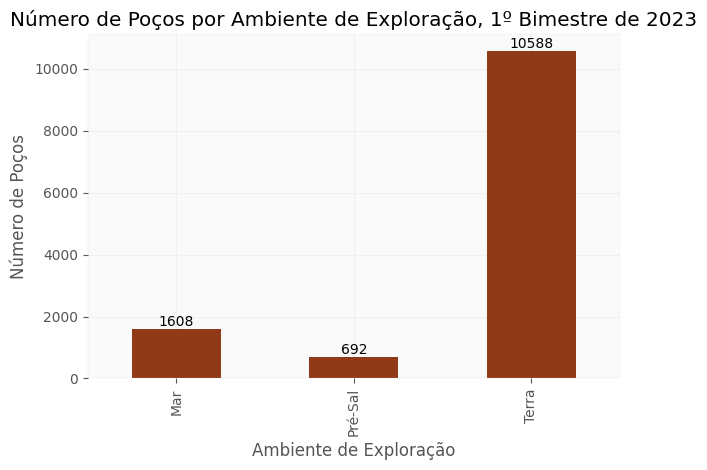

In [ ]:
# Agrupa por Exploração e conta os valores dos Poços
soma_por_exploracao_poco = dataset_analise.groupby('Exploração')['Contagem'].sum()

# Cria um gráfico de barras com os valores somados
graf_exploracao_poco = soma_por_exploracao_poco.plot(kind='bar', color = corPoco)

# Insere rótulos às barras 
for i, valor in enumerate(soma_por_exploracao_poco):
    graf_exploracao_poco.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')

# Acrescenta um título ao gráfico
plt.title('Número de Poços por Ambiente de Exploração, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Ambiente de Exploração')
plt.ylabel('Número de Poços') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
O gráfico apresenta um quantitativo muito superior de poços onshore (terra) comparados com os números offshore (e mar e pré-sal). Dentre os fatores que contribuem para essa diferença estão: geologia, custo e logística.
Muitas das principais reservas de petróleo estão localizadas em depósitos de rochas sedimentares em terra. Em relação aos custos, perfurar um poço em terra é quase sempre mais barato do que em mar. As plataformas offshore são mais caras de construir e manter, além de exigir equipamentos e técnicas de perfuração mais avançados e complexos. Com respeito à logística, a extração de petróleo em terra é geralmente mais fácil do que em mar, já que não há necessidade de transportar equipamentos e suprimentos para o alto mar. Além disso, os poços em terra estão localizados perto de infraestruturas existentes, como rodovias e redes de transporte, tornando mais fácil e econômico o transporte de equipamentos, suprimentos e pessoal.

###4.2.b. Exploração X Produção de Óleo

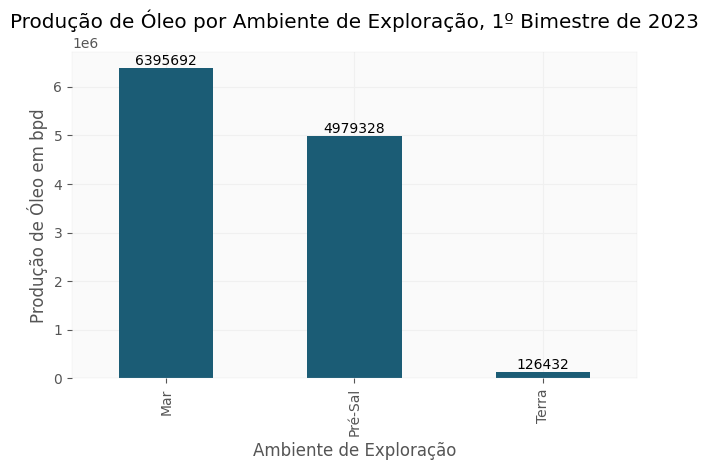

In [ ]:
# Agrupa por Exploração e soma a Produção de Óleo
soma_por_exploracao_oleo = dataset_analise.groupby('Exploração')['Óleo_bpd'].sum().astype(int)

# Cria um gráfico de barras com os valores somados
graf_exploracao_oleo = soma_por_exploracao_oleo.plot(kind='bar', color = corOleo)

# Insere rótulos às barras 
for i, valor in enumerate(soma_por_exploracao_oleo):
    graf_exploracao_oleo.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')

# Acrescenta um título ao gráfico
plt.title('Produção de Óleo por Ambiente de Exploração, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Ambiente de Exploração')
plt.ylabel('Produção de Óleo em bpd') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
Esse gráfico vai de encontro ao anterior. O senso comum espera que mais poços entreguem mais produção. No entanto, os poços offshore, em mar(1608) e no pré-sal(692) produzem mais do que os poçso de terra (10588). Para justificar, dois pontos podem ser considerados: reservas e pressão.
Os depósitos offshore de petróleo são geralmente maiores do que aqueles em terra. Isso ocorre porque os depósitos em mar são formados por processos geológicos complexos que podem resultar em grandes acumulações de hidrocarbonetos. Além disso, a pressão no reservatório em mar pode ser maior do que em terra. A alta pressão ajuda a forçar o petróleo para fora do reservatório. A pressão também pode ajudar a manter a produção de petróleo em um nível mais alto e constante ao longo do tempo.

###4.2.c. Exploração X Grau API

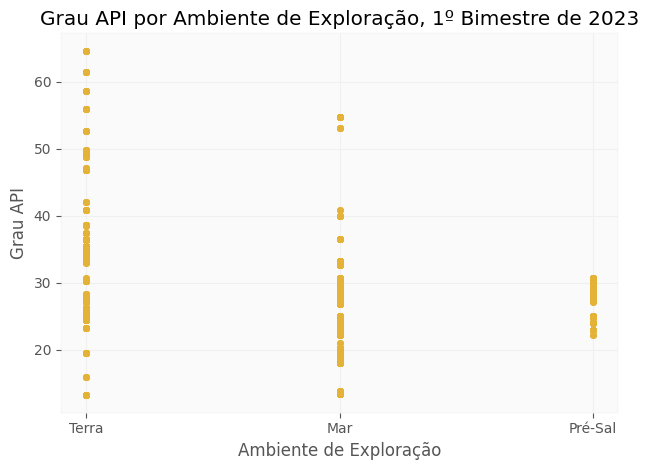

In [ ]:
# Plota o gráfico de dispersão
dataset_analise.plot.scatter(x = 'Exploração', y = 'Grau_API', color = corAPI)

# Acrescenta um título ao gráfico
plt.title('Grau API por Ambiente de Exploração, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Ambiente de Exploração')
plt.ylabel('Grau API') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
O gráfico mostra que a maior parte do óleo produzido é de médio a leve pois, com grau API maior que 31 são considerados leves; entre 22 e 31 graus API, são médios.
Por definição, quanto maior a densidade relativa, menor o grau API. Quanto maior o grau API, maior o valor do petróleo no mercado, pois, sendo mais leve, ele fornece derivados de maior valor agregado e tem um processo de refino mais barato. 



##4.3. Análise por Bacia


###4.3.a. Bacia X Poço

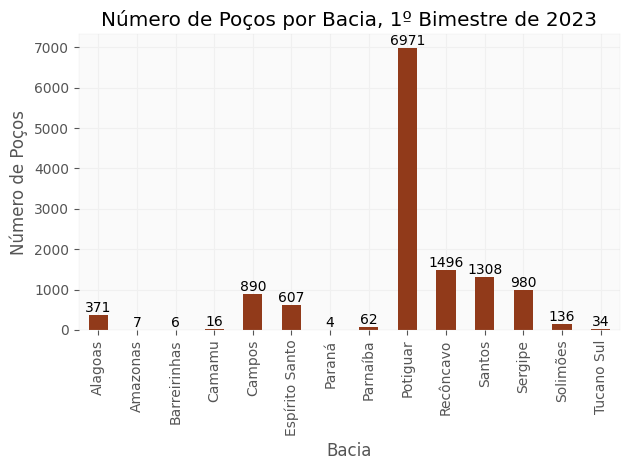

In [ ]:
# Agrupa por Bacia e conta os valores dos Poços
soma_por_bacia_poco = dataset_analise.groupby('Bacia')['Contagem'].sum()

# Cria um gráfico de barras com os valores somados
graf_bacia_poco = soma_por_bacia_poco.plot(kind='bar', color = corPoco)

# Insere rótulos às barras as barras 
for i, valor in enumerate(soma_por_bacia_poco):
    graf_bacia_poco.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')

# Acrescenta um título ao gráfico
plt.title('Número de Poços por Bacia, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Bacia')
plt.ylabel('Número de Poços') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
O gráfico, apesar de não separar por ambiente de exploração, confirma a maior distribuição em terra dos poços, visto que, dentre as 5 maiores, as bacias Potiguar,Recôncavo e Sergipe são majoritariamente terrestres.

###4.3.b. Bacia X Produçao de Óleo

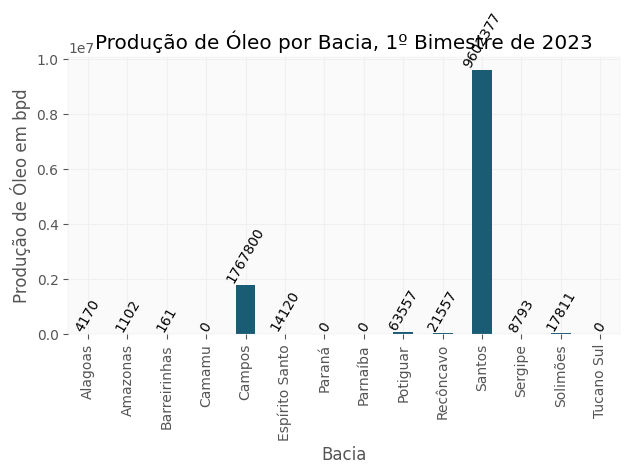

In [ ]:
# Agrupa por Bacia e soma por Produção de Óleo
soma_por_bacia_oleo = dataset_analise.groupby('Bacia')['Óleo_bpd'].sum().astype(int)

# Cria um gráfico de barras com os valores somados
graf_bacia_oleo = soma_por_bacia_oleo.plot(kind='bar', color = corOleo)

# Insere rótulos às barras s 
for i, valor in enumerate(soma_por_bacia_oleo):
    graf_bacia_oleo.annotate(str(valor), xy=(i, valor), ha='center', va='bottom', rotation=60)

# Acrescenta um título ao gráfico
plt.title('Produção de Óleo por Bacia, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Bacia')
plt.ylabel('Produção de Óleo em bpd') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
O gráfico evidencia que as bacias de Campos e Santos que estão entre as 5 mais poços perfurados são as que entregam maior volume de óleo produzido.

###4.3.c. Bacia X Grau API

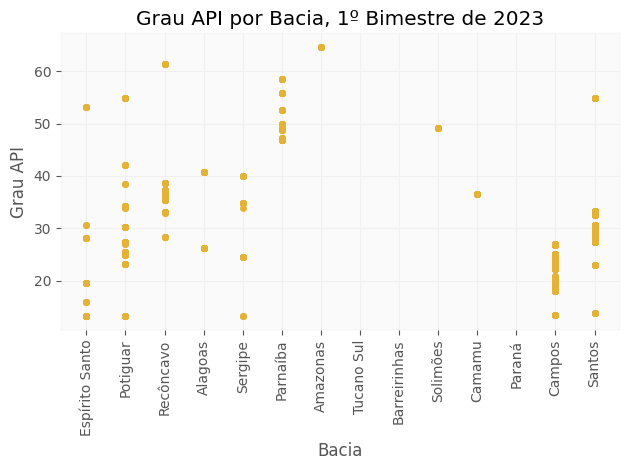

In [ ]:
# Plota o gráfico de dispersão
ax_bacia = dataset_analise.plot.scatter(x = 'Bacia', y = 'Grau_API', color = corAPI)
ax_bacia.set_xticklabels(ax_bacia.get_xticklabels(), rotation=90)

# Acrescenta um título ao gráfico
plt.title('Grau API por Bacia, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Bacia')
plt.ylabel('Grau API') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
No gráfico, a distribuições do grau API tendem a se concentrar em uma faixa determinada para cada bacia. Nota-se uma boa quantidade óleo caracterizado como leve. Vale destacar que a bacia de Santos apresenta faixa de óleo de médio a leve com registro de óleo muito leve. A bacia potiguar tem dados todas as categorias de grau api.

##4.4. Análise por Estado

###4.4.a. Estado X Poço

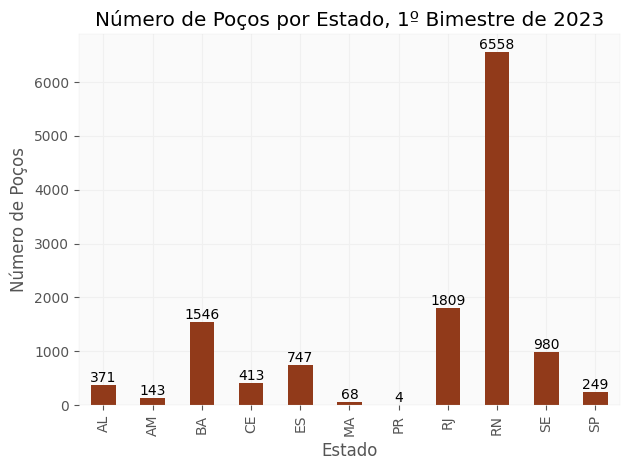

In [ ]:
# Agrupa por Estado e conta os valores dos Poços
soma_por_estado_poco = dataset_analise.groupby('Sigla UF')['Contagem'].sum()

# Cria um gráfico de barras com os valores somados
graf_estado_poco = soma_por_estado_poco.plot(kind='bar', color = corPoco)

# Insere rótulos às barras  
for i, valor in enumerate(soma_por_estado_poco):
    graf_estado_poco.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')

# Acrescenta um título ao gráfico
plt.title('Número de Poços por Estado, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Estado')
plt.ylabel('Número de Poços') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
Esse gráfico mostra queo Rio Grande do Norte é o estado com maior número de poços. A bacia sedimentar terrestre da região justifica esse quantitativo e o tempo de exploração na região, também. Do outro lado, com menor número de poços o estado do Paraná.

###4.4.b. Estado X Produção de Óleo

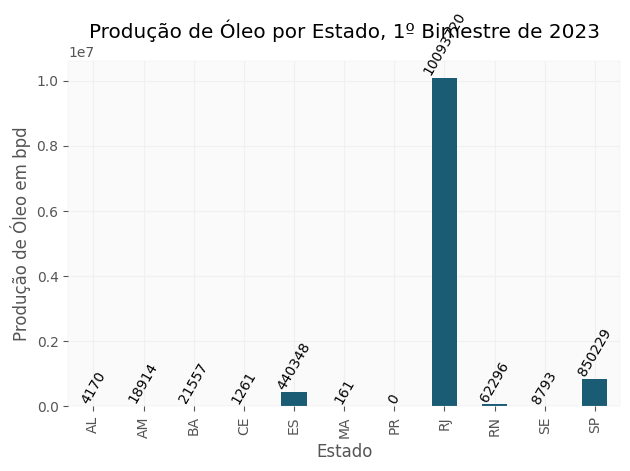

In [ ]:
# Agrupa por Estado e soma por Produção de Óleo
soma_por_estado_oleo = dataset_analise.groupby('Sigla UF')['Óleo_bpd'].sum().astype(int)

# Cria um gráfico de barras com os valores somados
graf_estado_oleo = soma_por_estado_oleo.plot(kind='bar', color = corOleo)

# Insere rótulos às barras  
for i, valor in enumerate(soma_por_estado_oleo):
    graf_estado_oleo.annotate(str(valor), xy=(i, valor), ha='center', va='bottom', rotation=60)

# Acrescenta um título ao gráfico
plt.title('Produção de Óleo por Estado, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Estado')
plt.ylabel('Produção de Óleo em bpd') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
O gráfico apresenta os estados do Rio de Janeiro e São Paulo em concordância com as bacias de Campos e de Santos, apresentando o maior volume de óleo.

###4.4.c. Estado X Grau API

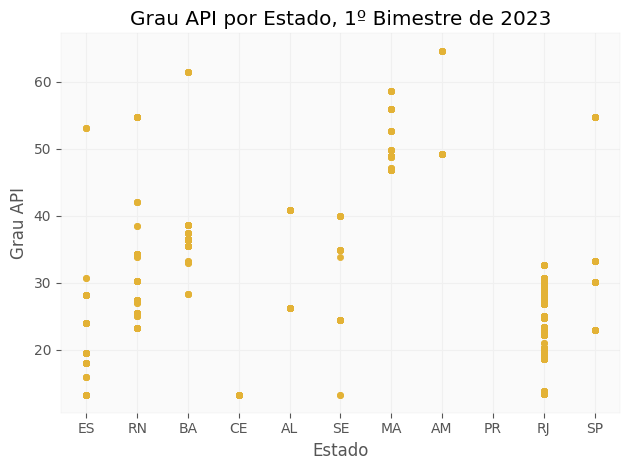

In [ ]:
# Plota o gráfico de dispersão
dataset_analise.plot.scatter(x = 'Sigla UF', y = 'Grau_API', color = corAPI)

# Acrescenta um título ao gráfico
plt.title('Grau API por Estado, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Estado')
plt.ylabel('Grau API') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
Nesse gráfico é possível observar que a bacia de Santos em SP apresenta óleo de médio a pesado com registros também de óleo leve. E o óleo do Rio de Janeiro é bastante concentrado na faixa de pesado a médio.

##4.5. Análise por Campo

###4.5.a. Campo X Poço

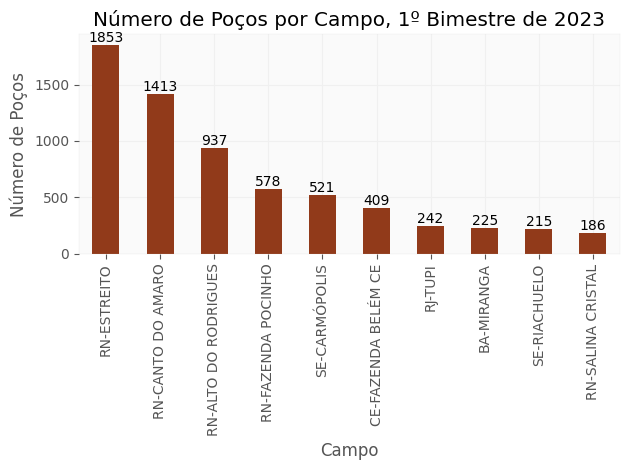

In [ ]:
# Agrupa as colunas Campo e Estado para facilitar leitura do Gráfico
dataset_analise['UF_Campo'] = dataset_analise['Sigla UF'].str.cat(dataset_analise['Campo'], sep='-')
fig, ax = plt.subplots()

# Agrupa por Campo e mostra a soma dos 10 maiores valores de número des Poços 
soma_por_campo_poco = dataset_analise.groupby('UF_Campo')['Contagem'].sum().nlargest(10)

# Cria um gráfico de barras com os valores somados
graf_campo_poco = soma_por_campo_poco.plot(kind='bar', color = corPoco)

# Insere rótulos às barras  
for i, valor in enumerate(soma_por_campo_poco):
    graf_campo_poco.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')

# Acrescenta um título ao gráfico
plt.title('Número de Poços por Campo, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Campo')
plt.ylabel('Número de Poços') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
Nesse gráfico por campo, observa-se que dentre os 10 campos com maior número de poços, 6 estão no RN e CE, logo, na Bacia Potiguar.

###4.5.b. Campo X Produção de Óleo

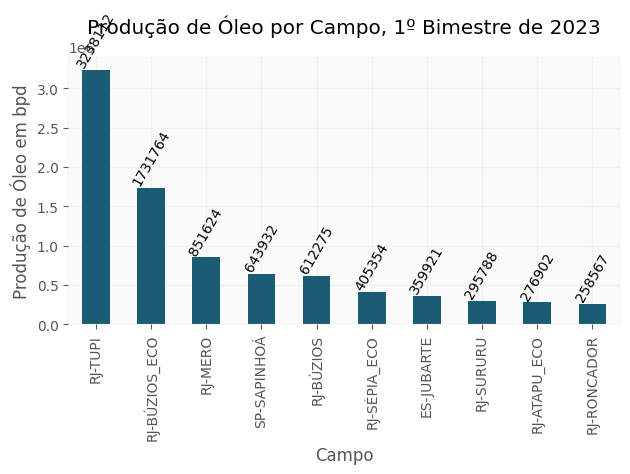

In [ ]:
# Agrupa as colunas Campo e Estado para facilitar leitura do Gráfico
dataset_analise['UF_Campo'] = dataset_analise['Sigla UF'].str.cat(dataset_analise['Campo'], sep='-')
fig, ax = plt.subplots()

# Agrupa por Campo e mostra a soma dos 10 maiores valores de Produção de Óleo
soma_por_campo_oleo = dataset_analise.groupby('UF_Campo')['Óleo_bpd'].sum().astype(int).nlargest(10)

# Cria um gráfico de barras com os valores somados
graf_campo_oleo = soma_por_campo_oleo.plot(kind='bar', color = corOleo)

# Insere rótulos às barras as barras 
for i, valor in enumerate(soma_por_campo_oleo):
    graf_campo_oleo.annotate(str(valor), xy=(i, valor), ha='center', va='bottom', rotation=60)

# Acrescenta um título ao gráfico
plt.title('Produção de Óleo por Campo, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Campo')
plt.ylabel('Produção de Óleo em bpd') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

####-> Análise
O gráfico das 10 maiores produções de óleo concentra os campos do sudeste, com 7 registros no Rio de Janeiro.

###4.5.c. Campo X Grau API

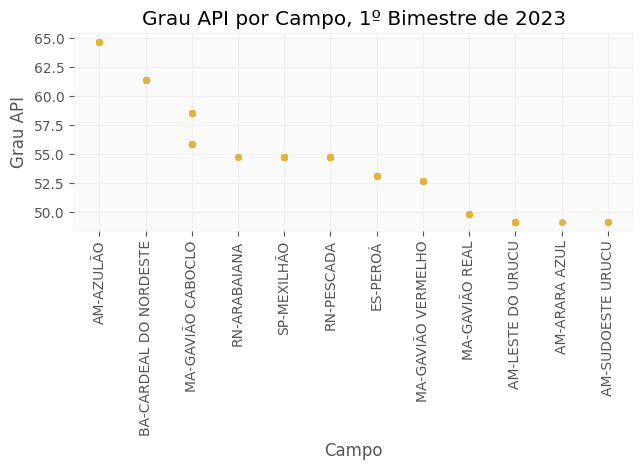

In [ ]:
# Agrupa as colunas Campo e Estado para facilitar leitura do Gráfico
dataset_analise['UF_Campo'] = dataset_analise['Sigla UF'].str.cat(dataset_analise['Campo'], sep='-')
fig, ax = plt.subplots()

# Plota o gráfico de dispersão apresnetando os 100 maiores registros
df_top = dataset_analise.nlargest(100, 'Grau_API')
ax_campo = df_top.plot.scatter(x = 'UF_Campo', y = 'Grau_API', ax = ax, color = corAPI)
ax_campo.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Acrescenta um título ao gráfico
plt.title('Grau API por Campo, 1º Bimestre de 2023')

# Define os títulos dos eixos
plt.xlabel('Campo')
plt.ylabel('Grau API') 

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()


####-> Análise
Esse gráfico apresenta apenas os 100 maiores registros e portanto, mostra apenas distribuição de óleo leve. Ele é interessante porque vai de encontro ao número de poços que se concentra na bacia Potiguar, ou o volume produzido que tem maiores valores nas bacias do Sudeste. Os 100 registros de óleo leve estão distribuídos por vários estados e regiões do país.

# 5.Conclusões

---

São pontos relevantes para o cenário de produção de óleo, 
em bpd, no Brasil no primeiro bimestre de 2023:
*   A exploração offshore concentra a maior produção de óleo com pouco mais de 17% dos poços do total perfurado no país;
*  O Sudeste, é a região brasileira com maior produção de óleo e o Nordeste a região com maior número de poços perfurados;  
*   Em termos de Grau API, No Brasil, a maioria do petróleo produzido tem um grau API entre 20 e 30, o que significa que é relativamente pesado;
*   Os poços considerados leves estão distribuídos em diferentes estados e regiões, do país. Estes, tem alto valor agregado;
*   O Brasil por sua história e resultados, firma-se no cenário mundial de petróleo com forte potencial. 


